In [3]:
#Cristian Rivas

# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Cargar el dataset localmente
df = pd.read_csv("4_WineQT.csv")

# Vista inicial del dataset
print("--- Información Inicial del Dataset ---")
print(f"Cantidad de filas: {df.shape[0]}, Cantidad de columnas: {df.shape[1]}")
print("\n--- Primeras 5 Filas del Dataset ---")
display(df.head())  # Usar display para una visualización más clara

# Crear una tabla con información adicional: valores nulos, no nulos y tipos de datos
info_dataset = pd.DataFrame({
    'Columna': df.columns,
    'Valores No Nulos': df.notnull().sum(),
    'Valores Nulos': df.isnull().sum(),
    'Tipo de Dato': df.dtypes
}).reset_index(drop=True)

print("\n--- Información Detallada del Dataset ---")
display(info_dataset)  # Mostrar la tabla con display

# Identificar y eliminar duplicados
filas_iniciales = df.shape[0]
df_sin_duplicados = df.drop_duplicates()
filas_finales = df_sin_duplicados.shape[0]
filas_duplicadas = filas_iniciales - filas_finales

# Resumen de duplicados
print("\n--- Resumen de Duplicados ---")
resumen_duplicados = pd.DataFrame({
    "Filas Iniciales": [filas_iniciales],
    "Filas Duplicadas Eliminadas": [filas_duplicadas],
    "Filas Restantes": [filas_finales]
})
display(resumen_duplicados)

# Actualizar el DataFrame para continuar trabajando sin duplicados
df = df_sin_duplicados

--- Información Inicial del Dataset ---
Cantidad de filas: 1143, Cantidad de columnas: 13

--- Primeras 5 Filas del Dataset ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



--- Información Detallada del Dataset ---


,Columna,Valores No Nulos,Valores Nulos,Tipo de Dato
0,fixed acidity,1143,0,float64
1,volatile acidity,1143,0,float64
2,citric acid,1143,0,float64
3,residual sugar,1143,0,float64
4,chlorides,1143,0,float64
5,free sulfur dioxide,1143,0,float64
6,total sulfur dioxide,1143,0,float64
7,density,1143,0,float64
8,pH,1143,0,float64
9,sulphates,1143,0,float64



--- Resumen de Duplicados ---


,Filas Iniciales,Filas Duplicadas Eliminadas,Filas Restantes
0,1143,0,1143



--- Generando Boxplots para cada variable numérica ---


<Figure size 1500x1000 with 0 Axes>

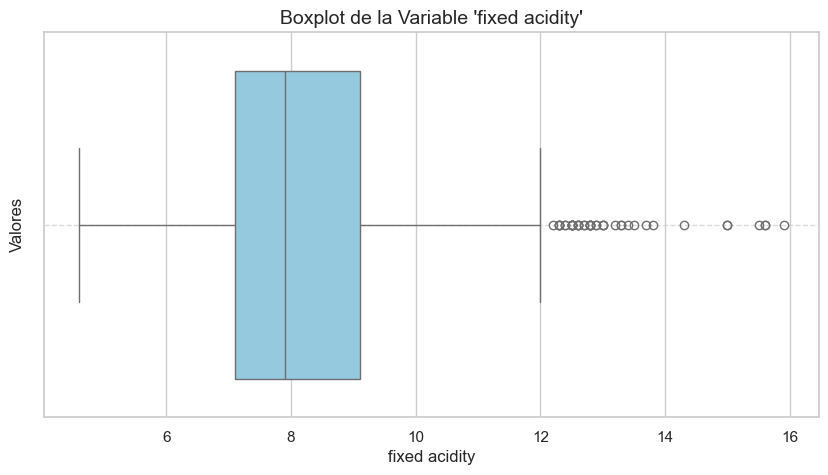

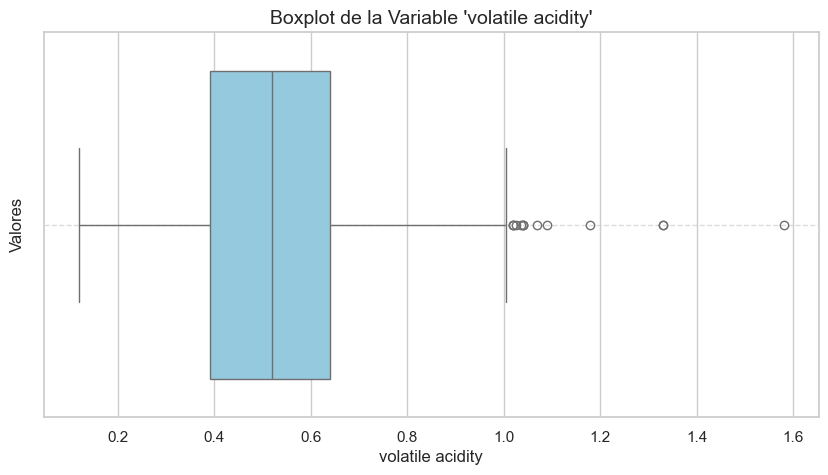

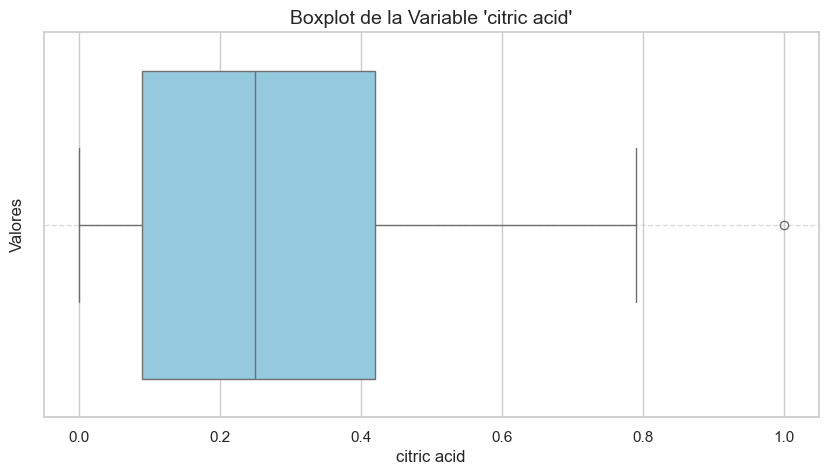

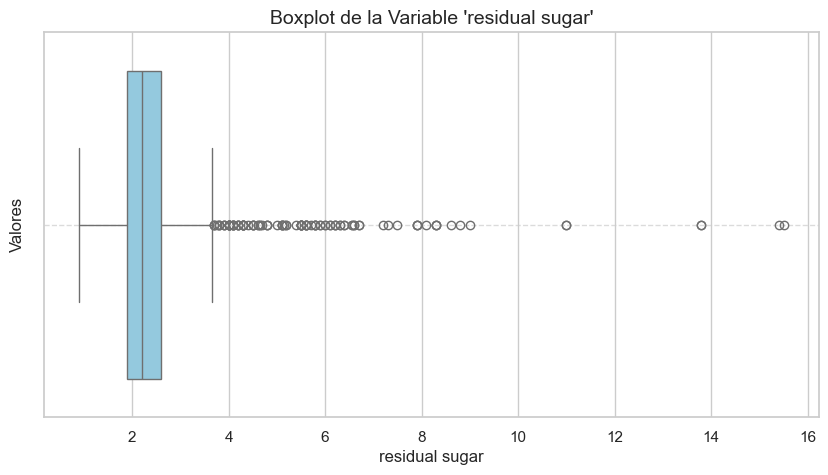

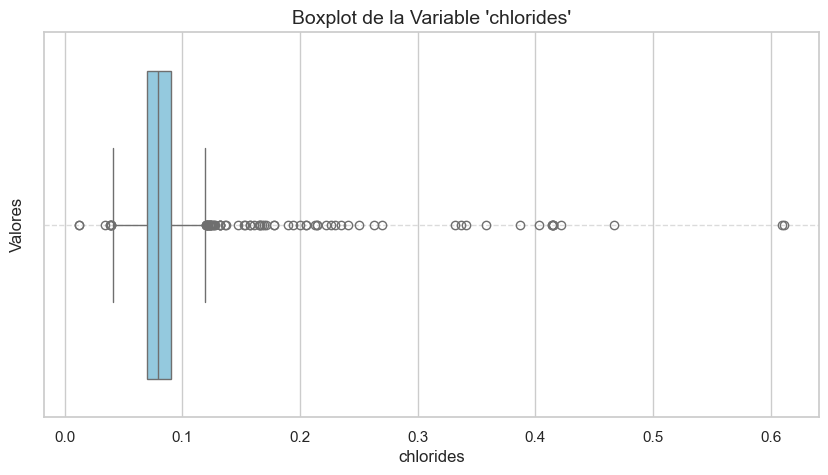

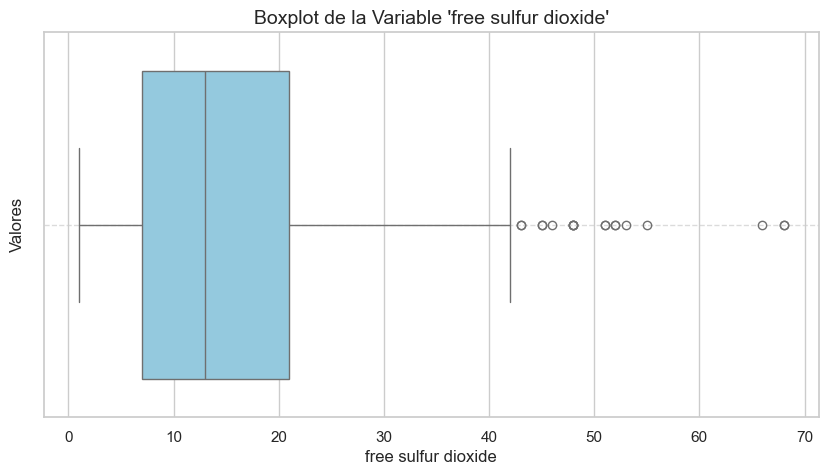

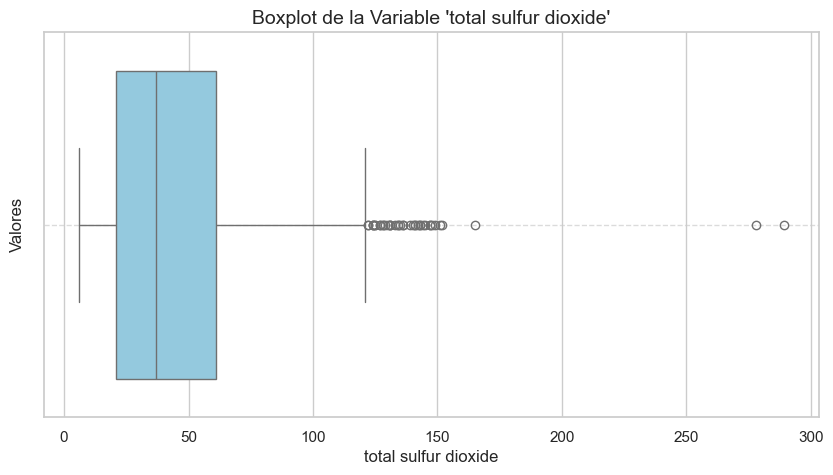

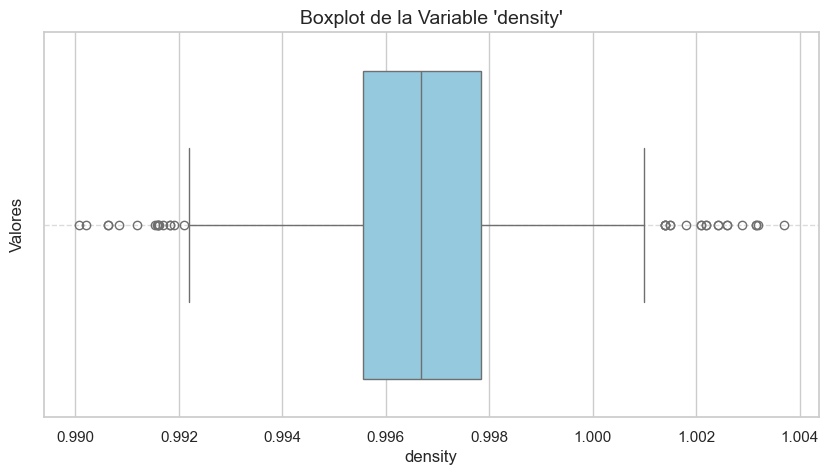

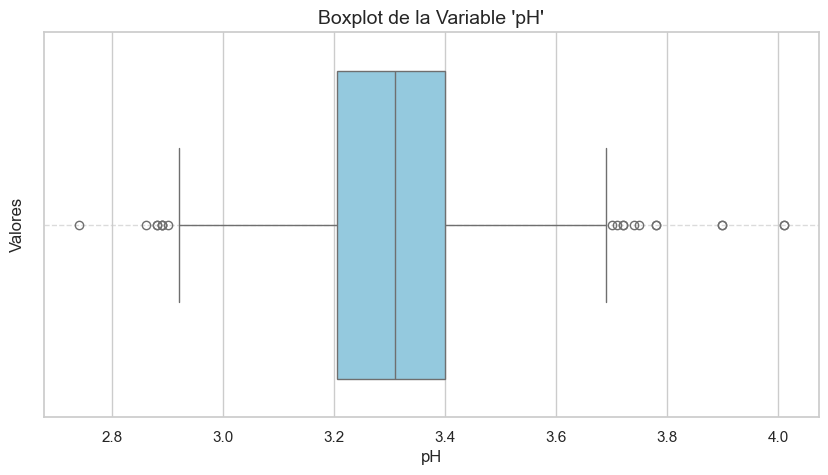

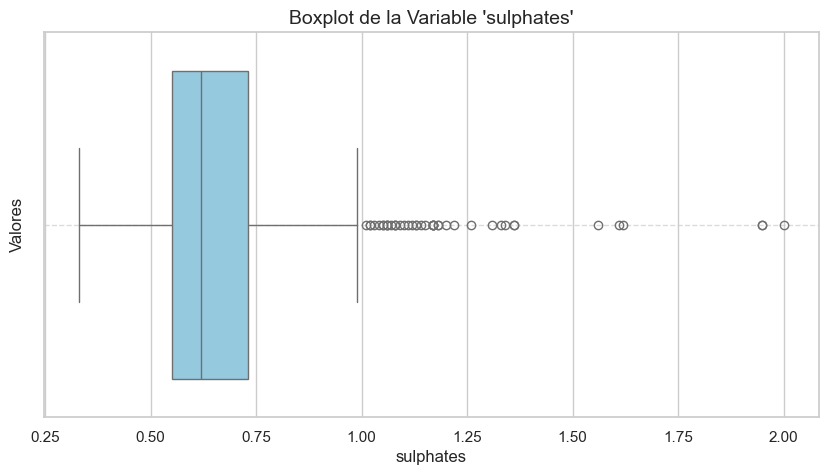

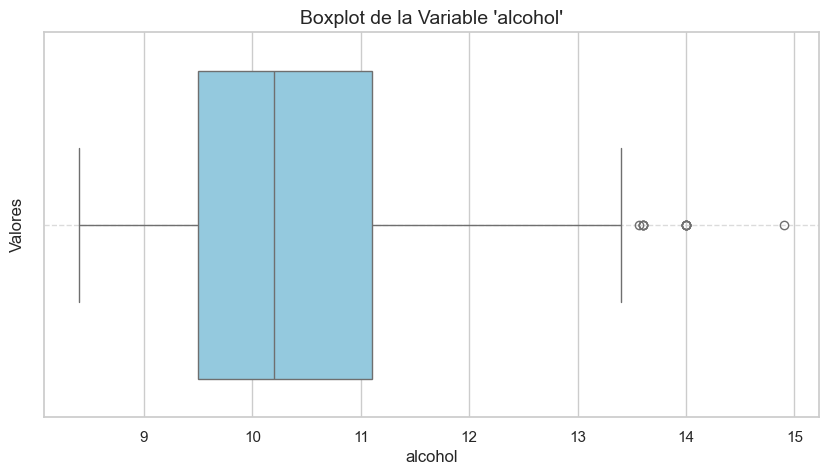

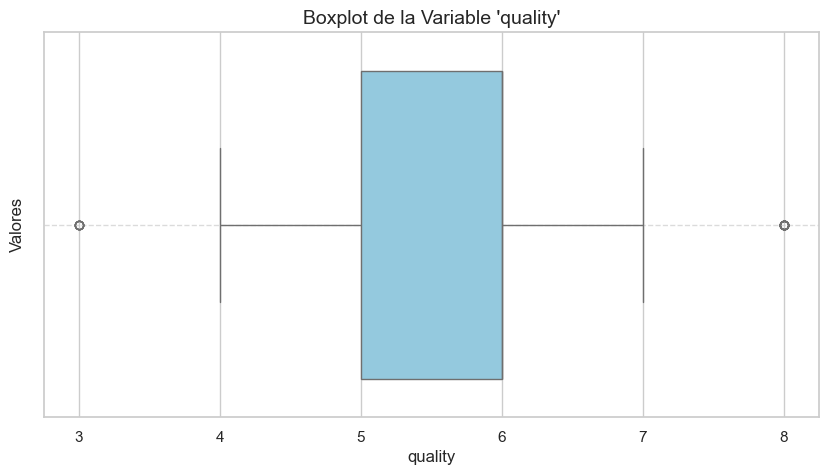

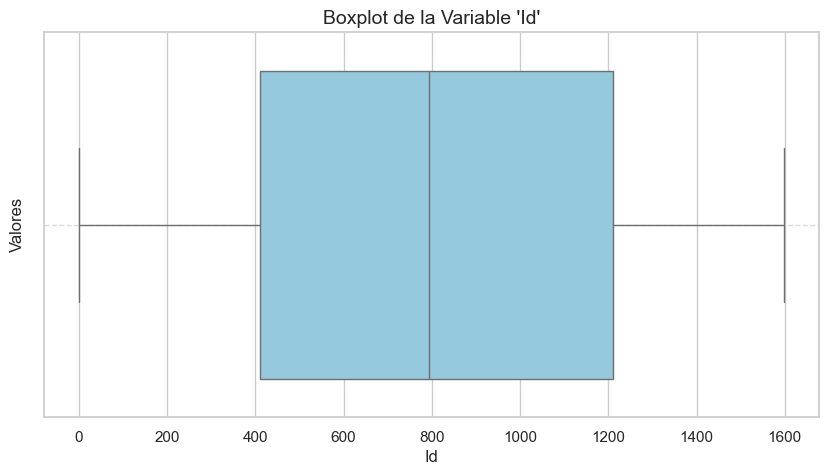

In [4]:
# Configuración general para gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Crear un boxplot para cada columna numérica
print("\n--- Generando Boxplots para cada variable numérica ---")

for columna in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=columna, color="skyblue")
    plt.title(f"Boxplot de la Variable '{columna}'", fontsize=14)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel("Valores", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


He concluido que los valores extremos no son errores sino datos razonables dado el contexto, por lo tanto no los eliminaré